# Simplified APRA MySuper Heatmaps with Python

This is the code discussed over on my blog here:  
https://www.bradleysawler.com/engineering/simplified-apra-mysuper-heatmaps-with-python

In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import re
import math


# import plot libraries
import seaborn as sns
sns.set_palette('Set2')
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

# Import others
import os, os.path
from pathlib import Path
import datetime 
from tabulate import tabulate

import myfuncts as mf
def fn_pd_options_display(max_columns = 20, max_rows=50, max_colwidth=200):
    """Set Pandas Display options"""
    pd.options.display.max_columns = max_columns  # None -> No Restrictions
    pd.options.display.max_rows = max_rows    # None -> Be careful with this 
    pd.options.display.max_colwidth = max_colwidth
fn_pd_options_display()

C:\Users\berno\Miniconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Open Files

Files can be downloaded from here: https://www.apra.gov.au/mysuper-product-heatmap


In [2]:
fp_1 = r'C:\Users\berno\OneDrive\Learning\Python\Scripts\data\MySuper Product Heatmap.csv'
skiprows_1 = 0

fp_2 = r'C:\Users\berno\OneDrive\Learning\Python\Scripts\data\APRA MySuper Product Heatmap.xlsx'
sh_2 = 'Heatmap'
skiprows_2 = 4



# Read in csv file
df_raw = pd.read_csv(Path(fp_1), skiprows=skiprows_1)

# Read in Excel file
df_2_raw = pd.read_excel(Path(fp_2), sheet_name=sh_2, skiprows=skiprows_2)

In [3]:
df_raw

,rse_licensee,rse_name,mysuper_product_name,lifecycle_stage_name,single_strategy_lifecycle_indicator,rse_net_assets_000,proportion_of_total_assets_in_mysuper,rse_total_accounts,strategic_growth_asset_allocation,5_year_net_investment_return_nir_p_a,...,administration_fees_disclosed_100_000_account_balance,administration_fees_disclosed_250_000_account_balance,total_fees_disclosed_10_000_account_balance,total_fees_disclosed_25_000_account_balance,total_fees_disclosed_50_000_account_balance,total_fees_disclosed_100_000_account_balance,total_fees_disclosed_250_000_account_balance,rse_adjusted_total_accounts_growth_rate_3_year_average,rse_net_cash_flow_ratio_3_year_average,rse_net_rollover_ratio_3_year_average
0,AMP Superannuation Limited,AMP Retirement Trust,AMP MySuper No.1,NaN,Single strategy,16657866.0,0.05,290026.0,0.72,0.0785,...,0.0057,0.0050,0.0177,0.0112,0.0091,0.0080,0.0073,0.0039,-0.0646,-0.0435
1,AMP Superannuation Limited,AMP Superannuation Savings Trust,AFLPA & AFL Industry MySuper,NaN,Lifecycle,55491521.0,0.35,1501221.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0935,-0.0602,-0.0800
2,AMP Superannuation Limited,AMP Superannuation Savings Trust,AFLPA & AFL Industry MySuper,AFLPA & AFL MySuper 1990s,NaN,NaN,NaN,NaN,0.85,0.0850,...,0.0026,0.0023,0.0139,0.0108,0.0097,0.0092,0.0089,NaN,NaN,NaN
3,AMP Superannuation Limited,AMP Superannuation Savings Trust,AFLPA & AFL Industry MySuper,AFLPA & AFL MySuper 1980s,NaN,NaN,NaN,NaN,0.85,0.0861,...,0.0026,0.0023,0.0142,0.0111,0.0100,0.0095,0.0092,NaN,NaN,NaN
4,AMP Superannuation Limited,AMP Superannuation Savings Trust,AFLPA & AFL Industry MySuper,AFLPA & AFL MySuper 1970s,NaN,NaN,NaN,NaN,0.80,0.0835,...,0.0026,0.0023,0.0144,0.0113,0.0102,0.0097,0.0094,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,Westpac Securities Administration Limited,Westpac Mastertrust - Superannuation Division,BT Business MySuper,MySuper 1980s LifeStage,NaN,NaN,NaN,NaN,0.90,0.0839,...,0.0054,0.0049,0.0205,0.0150,0.0131,0.0122,0.0117,NaN,NaN,NaN
413,Westpac Securities Administration Limited,Westpac Mastertrust - Superannuation Division,BT Business MySuper,MySuper 1970s LifeStage,NaN,NaN,NaN,NaN,0.90,0.0849,...,0.0054,0.0049,0.0205,0.0150,0.0131,0.0122,0.0117,NaN,NaN,NaN
414,Westpac Securities Administration Limited,Westpac Mastertrust - Superannuation Division,BT Business MySuper,MySuper 1960s LifeStage,NaN,NaN,NaN,NaN,0.63,0.0688,...,0.0054,0.0049,0.0203,0.0148,0.0129,0.0120,0.0115,NaN,NaN,NaN
415,Westpac Securities Administration Limited,Westpac Mastertrust - Superannuation Division,BT Business MySuper,MySuper 1950s LifeStage,NaN,NaN,NaN,NaN,0.36,0.0540,...,0.0054,0.0049,0.0201,0.0146,0.0127,0.0118,0.0113,NaN,NaN,NaN


In [4]:
df_raw.columns

Index(['rse_licensee', 'rse_name', 'mysuper_product_name',
       'lifecycle_stage_name', 'single_strategy_lifecycle_indicator',
       'rse_net_assets_000', 'proportion_of_total_assets_in_mysuper',
       'rse_total_accounts', 'strategic_growth_asset_allocation',
       '5_year_net_investment_return_nir_p_a',
       '5_year_nir_relative_to_simple_reference_portfolio_p_a',
       '5_year_nir_relative_to_listed_saa_benchmark_portfolio_p_a',
       '5_year_net_return_50_000_rep_member_p_a',
       '3_year_net_investment_return_nir_p_a',
       '3_year_nir_relative_to_simple_reference_portfolio_p_a',
       '3_year_nir_relative_to_listed_saa_benchmark_portfolio_p_a',
       '3_year_net_return_50_000_rep_member_p_a',
       'administration_fees_disclosed_10_000_account_balance',
       'administration_fees_disclosed_25_000_account_balance',
       'administration_fees_disclosed_50_000_account_balance',
       'administration_fees_disclosed_100_000_account_balance',
       'administration_f

In [5]:
def fn_check_missing_data(df):
    """check for any missing data in the df (display in descending order)"""
    return df.isnull().sum().sort_values(ascending=False)
fn_check_missing_data(df_raw)

rse_net_rollover_ratio_3_year_average                        320
rse_adjusted_total_accounts_growth_rate_3_year_average       320
single_strategy_lifecycle_indicator                          320
rse_net_assets_000                                           320
proportion_of_total_assets_in_mysuper                        320
rse_total_accounts                                           320
rse_net_cash_flow_ratio_3_year_average                       320
5_year_net_investment_return_nir_p_a                         154
5_year_nir_relative_to_simple_reference_portfolio_p_a        154
5_year_nir_relative_to_listed_saa_benchmark_portfolio_p_a    154
5_year_net_return_50_000_rep_member_p_a                      154
3_year_nir_relative_to_listed_saa_benchmark_portfolio_p_a    138
strategic_growth_asset_allocation                            138
3_year_net_investment_return_nir_p_a                         138
3_year_nir_relative_to_simple_reference_portfolio_p_a        138
3_year_net_return_50_000_

In [6]:
# Define columns of interest
cols_1 = ['rse_name', 'mysuper_product_name',
          'strategic_growth_asset_allocation', 
          '5_year_net_investment_return_nir_p_a', 
           'total_fees_disclosed_10_000_account_balance',
           'total_fees_disclosed_25_000_account_balance',
           'total_fees_disclosed_50_000_account_balance',
           'total_fees_disclosed_100_000_account_balance',
           'total_fees_disclosed_250_000_account_balance']

# Asssign dataframe with only columns of interest
df = df_raw.loc[:,cols_1]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   rse_name                                      417 non-null    object 
 1   mysuper_product_name                          417 non-null    object 
 2   strategic_growth_asset_allocation             279 non-null    float64
 3   5_year_net_investment_return_nir_p_a          263 non-null    float64
 4   total_fees_disclosed_10_000_account_balance   382 non-null    float64
 5   total_fees_disclosed_25_000_account_balance   382 non-null    float64
 6   total_fees_disclosed_50_000_account_balance   382 non-null    float64
 7   total_fees_disclosed_100_000_account_balance  382 non-null    float64
 8   total_fees_disclosed_250_000_account_balance  382 non-null    float64
dtypes: float64(7), object(2)
memory usage: 29.4+ KB


In [8]:
# Drop empty rows
df.dropna(axis=0, how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 416
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   rse_name                                      263 non-null    object 
 1   mysuper_product_name                          263 non-null    object 
 2   strategic_growth_asset_allocation             263 non-null    float64
 3   5_year_net_investment_return_nir_p_a          263 non-null    float64
 4   total_fees_disclosed_10_000_account_balance   263 non-null    float64
 5   total_fees_disclosed_25_000_account_balance   263 non-null    float64
 6   total_fees_disclosed_50_000_account_balance   263 non-null    float64
 7   total_fees_disclosed_100_000_account_balance  263 non-null    float64
 8   total_fees_disclosed_250_000_account_balance  263 non-null    float64
dtypes: float64(7), object(2)
memory usage: 20.5+ KB


In [9]:
def fn_floatformat(decimals):
    dec = '{:.'+str(decimals)+'f}'
    pd.options.display.float_format = dec.format

fn_floatformat(4)
df.describe()

,strategic_growth_asset_allocation,5_year_net_investment_return_nir_p_a,total_fees_disclosed_10_000_account_balance,total_fees_disclosed_25_000_account_balance,total_fees_disclosed_50_000_account_balance,total_fees_disclosed_100_000_account_balance,total_fees_disclosed_250_000_account_balance
count,263.0000,263.0000,263.0000,263.0000,263.0000,263.0000,263.0000
mean,0.6736,0.0729,0.0168,0.0123,0.0109,0.0101,0.0097
std,0.1832,0.0152,0.0044,0.0028,0.0024,0.0023,0.0022
min,0.1900,0.0375,0.0050,0.0050,0.0050,0.0050,0.0048
25%,0.5400,0.0624,0.0154,0.0113,0.0097,0.0088,0.0083
50%,0.7100,0.0768,0.0171,0.0120,0.0105,0.0098,0.0093
75%,0.8300,0.0834,0.0190,0.0138,0.0123,0.0113,0.0108
max,0.9800,0.0983,0.0437,0.0221,0.0193,0.0182,0.0175


In [10]:
df[['5_year_net_investment_return_nir_p_a', 
    'total_fees_disclosed_100_000_account_balance']].describe()

,5_year_net_investment_return_nir_p_a,total_fees_disclosed_100_000_account_balance
count,263.0000,263.0000
mean,0.0729,0.0101
std,0.0152,0.0023
min,0.0375,0.0050
25%,0.0624,0.0088
50%,0.0768,0.0098
75%,0.0834,0.0113
max,0.0983,0.0182


# General Functions
Moved to myfuncts.py and imported

# File Specific Functions

In [11]:

def fn_half_masked_corr_heatmap(dataframe, title=None, file=None):
    """Returns a Half-masked Correlation Heatmap
    dataframe: your data
    title: str chart title, optional
    file: str path+filename, optional """
    # https://github.com/manukalia/handy_data_viz_functions/
    plt.figure(figsize=(9,9))
    sns.set(font_scale=1)

    mask = np.zeros_like(dataframe.corr())
    mask[np.triu_indices_from(mask)] = True

    with sns.axes_style("white"):
        sns.heatmap(dataframe.corr(), mask=mask, annot=True, cmap='coolwarm')

    if title: plt.title(f'\n{title}\n', fontsize=18)
    plt.xlabel('')    # optional in case you want an x-axis label
    plt.ylabel('')    # optional in case you want a  y-axis label
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    
    return


def fn_corr_to_target(dataframe, target, title=None, file=None):
    """Corralation to a Target Variable (heat-spectrum)
    dataframe: the reference pandas dataframe
    target: (string) column name of the target variable
    title: (string) chart title
    title: (string) chart title
    """
    # https://github.com/manukalia/handy_data_viz_functions/
    plt.figure(figsize=(4,6))
    sns.set(font_scale=1)
    
    sns.heatmap(dataframe.corr()[[target]].sort_values(target,
                                                ascending=False)[1:],
                annot=True,
                cmap='coolwarm')
    
    if title: plt.title(f'\n{title}\n', fontsize=18)
    plt.xlabel('')    # optional in case you want an x-axis label
    plt.ylabel('')    # optional in case you want a  y-axis label
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    
    return


def fn_gen_scatterplots(dataframe, target_column, list_of_columns, cols=1, file=None):
    """Return Scatterplots of All Features vs. Target.
    Suptitle formatting adapted from Stackoverflow, Alexander McFarlane
    https://stackoverflow.com/questions/7066121/
    how-to-set-a-single-main-title-above-all-the-subplots-with-pyplot/35676071

    N-across scatterplots of each feature vs. target ...
    Required parameters: dataframe ... the reference pandas dataframe
                          target ... (string) column name of the target variable

    Optional parameters: title ... (string) chart title
                          file  ... (string) path+filename if you want to save image"""
    rows      = math.ceil(len(list_of_columns)/cols)
    figwidth  = 5 * cols
    figheight = 4 * rows

    fig, ax = plt.subplots(nrows   = rows,
                           ncols   = cols,
                           figsize = (figwidth, figheight))
    
    color_choices = ['blue', 'grey', 'goldenrod', 'r', 'black', 'darkorange', 'g']

    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    ax = ax.ravel()         # Ravel turns a matrix into a vector... easier to iterate

    for i, column in enumerate(list_of_columns):
        ax[i].scatter(dataframe[column],
                      dataframe[target_column],
                      color=color_choices[i % len(color_choices)],
                      alpha = 0.1)

#           Individual subplot titles, optional
#             ax[i].set_title(f'{column} vs. {target_column}', fontsize=18)

        ax[i].set_ylabel(f'{target_column}', fontsize=14)
        ax[i].set_xlabel(f'{column}', fontsize=14)

    fig.suptitle('\nEach Feature vs. Target Scatter Plots', size=24)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0, top=0.88)
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    return


def fn_gen_histograms(dataframe, cols=1, file=None):
    """N-across Histograms of each variable in the dataframe ...
    Required parameter: dataframe ... the reference pandas dataframe

    Optional parameters: cols ... no. of subplot columns across fig; default=1
                         file  ... (string) path+filename if you want to save image
    """
    # https://github.com/manukalia/handy_data_viz_functions/
    rows      = math.ceil(len(dataframe.columns)/cols)
    figwidth  = 5 * cols
    figheight = 4 * rows

    fig, ax = plt.subplots(nrows   = rows,
                           ncols   = cols,
                           figsize = (figwidth, figheight))
    
    color_choices = ['blue', 'grey', 'goldenrod', 'r', 'black', 'darkorange', 'g']
    ax = ax.ravel()         # Ravel turns a matrix into a vector... easier to iterate

    for i, column in enumerate(dataframe.columns):
        ax[i].hist(dataframe[column],
                      color=color_choices[i % len(color_choices)],
                      alpha = 1)
        
        ax[i].set_title(f'{dataframe[column].name}', fontsize=18)
        ax[i].set_ylabel('Observations', fontsize=14)
        ax[i].set_xlabel('', fontsize=14)
        
    fig.suptitle('\nHistograms for All Variables in Dataframe', size=24)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0, top=0.88)
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();

    return



def fn_gen_boxplots(dataframe, cols=1, file=None):
    """N-across boxplots of each variable in the dataframe ...
    Required parameter: dataframe ... the reference pandas dataframe

    Optional parameters: cols ... no. of subplot columns across fig; default=1
                         file  ... (string) path+filename if you want to save image
    """
    # https://github.com/manukalia/handy_data_viz_functions/
    rows      = math.ceil(len(dataframe.columns)/cols)
    figwidth  = 5 * cols
    figheight = 4 * rows

    fig, ax = plt.subplots(nrows   = rows,
                           ncols   = cols,
                           figsize = (figwidth, figheight))
    
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    ax = ax.ravel()         # Ravel turns a matrix into a vector... easier to iterate

    for i, column in enumerate(dataframe.columns):
        ax[i].boxplot(dataframe[column])
        
        ax[i].set_title(f'{dataframe[column].name}', fontsize=18)
        ax[i].set_ylabel('', fontsize=14)
        ax[i].set_xlabel('', fontsize=14)
        ax[i].tick_params(labelbottom=False)
        
    fig.suptitle('\nBoxplots for All Variables in Dataframe', size=24)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0, top=0.88)
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();

    return


def fn_scatterplot_sns(df, x_col, y_col, x_bounds, y_bounds, invest_amt,  graph_filepath, 
                       plot_params_dict):
    """Plot a scatter plot with a best fit line
    https://stackoverflow.com/questions/19068862/how-to-overplot-a-line-on-a-scatter-plot-in-python
    https://stackoverflow.com/questions/31357611/format-y-axis-as-percent
    """
    ax = sns.scatterplot(x=x_col, y=y_col, data=df, **plot_params_dict)
    ax.set(xlabel=f'Total fees for {invest_amt}k investment',
           ylabel='5 year NIR p.a.',
           xlim= x_bounds,
           ylim= y_bounds, 
           alpha= 0,
           title=f'5-year Net Investment Returns p.a. (as at 10 Dec 2019) for\n\
           total fees (${invest_amt}k account balance) for Strategic Growth Asset Allocation\
           > {sgaa:.0%}')
    
    #changing label ticks
    x_value=['{:,.1%}'.format(x) for x in ax.get_xticks()]
    y_value=['{:,.0%}'.format(x) for x in ax.get_yticks()]
    ax.set_xticklabels(x_value)
    ax.set_yticklabels(y_value)
    
    # Add correlation line
    axes = plt.gca()
    m, b = np.polyfit(df[x_col],
                      df[y_col], 1)
    X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
    plt.plot(X_plot, m*X_plot + b, '--', c='Blue');
    
    # Save figure    
    plt.savefig(graph_filepath+str(invest_amt)+'.png', dpi=None, format='png', bbox_inches='tight')

def fn_pivot_table(df, top_funds_to_show):
    """Pivot the dataframe and return the top N performers based on NIR.
    df: dataframe
    top_funds_to_show_show: interger
    """
    # agg function dictionary
    aggfunc_dict = {'5_year_net_investment_return_nir_p_a': 'max',
                '5_yr_nir_ranking': 'min',
                'total_fees_disclosed_10_000_account_balance': 'max',
                'total_fees_disclosed_25_000_account_balance': 'max',
                'total_fees_disclosed_50_000_account_balance': 'max',
                'total_fees_disclosed_100_000_account_balance': 'max',
                'total_fees_disclosed_250_000_account_balance': 'max', 
                'MySuper_Details': 'first'}
    index=['rse_name', 'mysuper_product_name', 'growth']
    performance_column = '5_year_net_investment_return_nir_p_a'
  
    return pd.pivot_table(df.sort_values(performance_column, ascending=False),
                          values=aggfunc_dict.keys(),
                          index=index,
                          aggfunc=aggfunc_dict
                          ).nlargest(top_funds_to_show, performance_column)


def fn_pivot_table_for_heatmap(df, top_funds_to_show, file=None):
    """Seaborn heatmap of top funds based on NIR
    df: dataframe
    top_funds_to_show_show: interger
    file: str value of a figure filename to save. Default is None, which doesn't save.
    """
    nir='5_year_net_investment_return_nir_p_a'
    
    # Get top N performers unique to each fund / risk tolerance (L, M, H)
    df_top_perform = fn_pivot_table(df, top_funds_to_show)
    df_top_perform.reset_index(inplace=True)
    
    # Pivot the top N performers with their details to be passed to the heatmap labels
    df_pt = df_top_perform[['MySuper_Details', nir]]
    
    # Set the index for use in the heatmap
    df_pt.set_index('MySuper_Details', inplace=True)

    fig, ax = plt.subplots(figsize=(4,10))

    sns.heatmap(df_pt.sort_values(nir, ascending=False), annot=True,
                cmap='coolwarm', cbar=False, fmt='.2%', ax=ax )
    
    plt.title(f'Heatmap of 5-year Net Investment Return p.a. - Top {top_funds_to_show} \n\
             Data from: APRA MySuper Products 10 December 2019',
             fontsize=20)
    plt.xlabel(f' 5-year Net Investment Return p.a.',
               fontsize=12)
    plt.ylabel('MySuper Product Name with Growth Asset Allocation: Low (L), Medium (M), High (H)',
               fontsize=12);
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();
    
def fn_pivot_table_for_heatmap_fees(df, total_fee, invest_amt, top_funds_to_show, file=None):
    """Seaborn heatmap of top funds based on NIR. 
    df: dataframe
    total_fee: the total fees columnn to display as a string
    invest_amt: investment amount in thousands as an integer. ie. 50,000 enter 50
    top_funds_to_show_show: interger
    file: str value of a figure filename to save. Default is None, which doesn't save.
    """
    
    # Get top N performers unique to each fund / risk tolerance (L, M, H)
    df_top_perform = fn_pivot_table(df, top_funds_to_show)
    df_top_perform.reset_index(inplace=True)
    
    # Pivot the top N performers with their details to be passed to the heatmap labels
    df_pt = df_top_perform[['MySuper_Details', total_fee]]
    
    # Set the index for use in the heatmap
    df_pt.set_index('MySuper_Details', inplace=True)
    
    fig, ax = plt.subplots(figsize=(4,10))

    sns.heatmap(df_pt.sort_values(total_fee, ascending=True), annot=True,
                cmap='coolwarm', fmt='.2%', cbar=False, ax=ax)
    
    plt.title(f'Heatmap of Total Fees for investment of ${invest_amt}k - Top {top_funds_to_show} NIR\n\
             Data from: APRA MySuper Products 10 December 2019', fontsize=20)
#     plt.xlabel(f' 5-year Net Investment Return p.a.',
#                fontsize=12)
    plt.ylabel(f'MySuper Product Name with Growth Asset Allocation: Low (L), Medium (M), High (H)\n\
               with Rank of the Top {top_funds_to_show} Funds based on NIR', fontsize=12)
    if file: plt.savefig(file, bbox_inches='tight')
    plt.show();

# Cleaning

In [12]:
# General cleanups

# Replace a really long name
df['mysuper_product_name'] = df['mysuper_product_name'].str.replace(
    'Goldman Sachs & JBWere Superannuation Fund_MySuper Product', 'MySuper Product')

# Add a column to group the growth asset allocations into Low, Medium, High
# Change from categorical type to string for use in charts
df['growth'] = pd.qcut(df['strategic_growth_asset_allocation'], q=3, 
                       labels=['L', 'M', 'H']).astype('str')

# Assign a ranking to the 5 year NIR for later sorting
df['5_yr_nir_ranking'] = df['5_year_net_investment_return_nir_p_a'].rank(method='min', 
                                                                         ascending=False).astype('int')
# Assign a ranking column to string type for later use in charts
df['5_yr_nir_rank_str'] = df['5_yr_nir_ranking'].astype('str')

# Add a concated column to be used in the heatmap
df['MySuper_Details'] = df['rse_name'] + ' - ' + df['mysuper_product_name'] + ' - '\
                       + df['growth'] + ' (NIR Rank ' + df['5_yr_nir_rank_str'] + ')'

df

,rse_name,mysuper_product_name,strategic_growth_asset_allocation,5_year_net_investment_return_nir_p_a,total_fees_disclosed_10_000_account_balance,total_fees_disclosed_25_000_account_balance,total_fees_disclosed_50_000_account_balance,total_fees_disclosed_100_000_account_balance,total_fees_disclosed_250_000_account_balance,growth,5_yr_nir_ranking,5_yr_nir_rank_str,MySuper_Details
0,AMP Retirement Trust,AMP MySuper No.1,0.7200,0.0785,0.0177,0.0112,0.0091,0.0080,0.0073,M,118,118,AMP Retirement Trust - AMP MySuper No.1 - M (NIR Rank 118)
2,AMP Superannuation Savings Trust,AFLPA & AFL Industry MySuper,0.8500,0.0850,0.0139,0.0108,0.0097,0.0092,0.0089,H,50,50,AMP Superannuation Savings Trust - AFLPA & AFL Industry MySuper - H (NIR Rank 50)
3,AMP Superannuation Savings Trust,AFLPA & AFL Industry MySuper,0.8500,0.0861,0.0142,0.0111,0.0100,0.0095,0.0092,H,42,42,AMP Superannuation Savings Trust - AFLPA & AFL Industry MySuper - H (NIR Rank 42)
4,AMP Superannuation Savings Trust,AFLPA & AFL Industry MySuper,0.8000,0.0835,0.0144,0.0113,0.0102,0.0097,0.0094,H,62,62,AMP Superannuation Savings Trust - AFLPA & AFL Industry MySuper - H (NIR Rank 62)
5,AMP Superannuation Savings Trust,AFLPA & AFL Industry MySuper,0.6000,0.0672,0.0140,0.0109,0.0098,0.0093,0.0090,L,180,180,AMP Superannuation Savings Trust - AFLPA & AFL Industry MySuper - L (NIR Rank 180)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,Westpac Mastertrust - Superannuation Division,BT Business MySuper,0.9000,0.0839,0.0205,0.0150,0.0131,0.0122,0.0117,H,59,59,Westpac Mastertrust - Superannuation Division - BT Business MySuper - H (NIR Rank 59)
413,Westpac Mastertrust - Superannuation Division,BT Business MySuper,0.9000,0.0849,0.0205,0.0150,0.0131,0.0122,0.0117,H,51,51,Westpac Mastertrust - Superannuation Division - BT Business MySuper - H (NIR Rank 51)
414,Westpac Mastertrust - Superannuation Division,BT Business MySuper,0.6300,0.0688,0.0203,0.0148,0.0129,0.0120,0.0115,M,172,172,Westpac Mastertrust - Superannuation Division - BT Business MySuper - M (NIR Rank 172)
415,Westpac Mastertrust - Superannuation Division,BT Business MySuper,0.3600,0.0540,0.0201,0.0146,0.0127,0.0118,0.0113,L,229,229,Westpac Mastertrust - Superannuation Division - BT Business MySuper - L (NIR Rank 229)


In [13]:
# Check the breakdown of the NIR
df['5_year_net_investment_return_nir_p_a'].value_counts(normalize=True, bins=3)

(0.078, 0.0983]    0.4639
(0.0578, 0.078]    0.3460
(0.0364, 0.0578]   0.1901
Name: 5_year_net_investment_return_nir_p_a, dtype: float64

In [14]:
# Check for any null values
df.isnull().sum()

rse_name                                        0
mysuper_product_name                            0
strategic_growth_asset_allocation               0
5_year_net_investment_return_nir_p_a            0
total_fees_disclosed_10_000_account_balance     0
total_fees_disclosed_25_000_account_balance     0
total_fees_disclosed_50_000_account_balance     0
total_fees_disclosed_100_000_account_balance    0
total_fees_disclosed_250_000_account_balance    0
growth                                          0
5_yr_nir_ranking                                0
5_yr_nir_rank_str                               0
MySuper_Details                                 0
dtype: int64

In [15]:
# Overview of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 0 to 416
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   rse_name                                      263 non-null    object 
 1   mysuper_product_name                          263 non-null    object 
 2   strategic_growth_asset_allocation             263 non-null    float64
 3   5_year_net_investment_return_nir_p_a          263 non-null    float64
 4   total_fees_disclosed_10_000_account_balance   263 non-null    float64
 5   total_fees_disclosed_25_000_account_balance   263 non-null    float64
 6   total_fees_disclosed_50_000_account_balance   263 non-null    float64
 7   total_fees_disclosed_100_000_account_balance  263 non-null    float64
 8   total_fees_disclosed_250_000_account_balance  263 non-null    float64
 9   growth                                        263 non-null    obj

#  Analysis

## Scatterplot - NIR vs Fees for a set Growth Allocation

Assign a strategic growth asset allocation value for evaluation. APRA Data Insights used 60% for comparison. 

In [16]:
# Set a minimum strategic growth asset allocation
sgaa = 0.6

df_sgaa = df.loc[df['strategic_growth_asset_allocation'] > sgaa]

# Assign the x and y column names for use in the plots
x_col = {50: 'total_fees_disclosed_50_000_account_balance',
         100: 'total_fees_disclosed_100_000_account_balance'}

y_col = '5_year_net_investment_return_nir_p_a'

# Set plot parameters to suit
plot_params_dict={'marker':'o'} # 'o' marker is the default. Included to show how to pass in **kwargs
x_bounds = (0.002, .02)
y_bounds = (.05, .1)

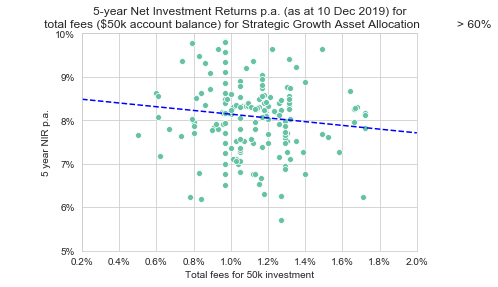

In [17]:
# Call the function to plot and save the findings
invest_amt = 50
fn_scatterplot_sns(df_sgaa, x_col[invest_amt], y_col, x_bounds, y_bounds, invest_amt, 
                   'img/apra_5_yr_nir_vs_fees_', plot_params_dict)

## Heatmap - Variable Correlations

In [18]:
# The table of values way
df.corr()

# OR this cool heatmap below

,strategic_growth_asset_allocation,5_year_net_investment_return_nir_p_a,total_fees_disclosed_10_000_account_balance,total_fees_disclosed_25_000_account_balance,total_fees_disclosed_50_000_account_balance,total_fees_disclosed_100_000_account_balance,total_fees_disclosed_250_000_account_balance,5_yr_nir_ranking
strategic_growth_asset_allocation,1.0000,0.8629,0.1771,0.2238,0.2399,0.2422,0.2411,-0.8230
5_year_net_investment_return_nir_p_a,0.8629,1.0000,0.0771,0.0958,0.1040,0.1043,0.0964,-0.9691
total_fees_disclosed_10_000_account_balance,0.1771,0.0771,1.0000,0.9332,0.8322,0.7498,0.6867,-0.0689
total_fees_disclosed_25_000_account_balance,0.2238,0.0958,0.9332,1.0000,0.9757,0.9374,0.8993,-0.0759
total_fees_disclosed_50_000_account_balance,0.2399,0.1040,0.8322,0.9757,1.0000,0.9907,0.9703,-0.0780
total_fees_disclosed_100_000_account_balance,0.2422,0.1043,0.7498,0.9374,0.9907,1.0000,0.9910,-0.0756
total_fees_disclosed_250_000_account_balance,0.2411,0.0964,0.6867,0.8993,0.9703,0.9910,1.0000,-0.0643
5_yr_nir_ranking,-0.8230,-0.9691,-0.0689,-0.0759,-0.0780,-0.0756,-0.0643,1.0000


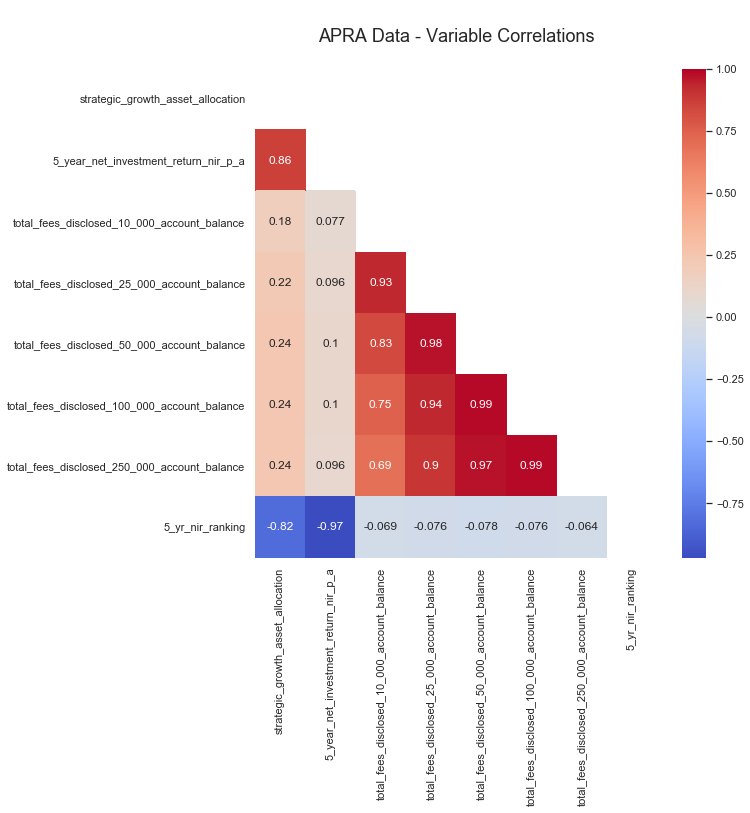

In [19]:
fn_half_masked_corr_heatmap(df, 'APRA Data - Variable Correlations', 'img/apra_half_mask_corr.png')

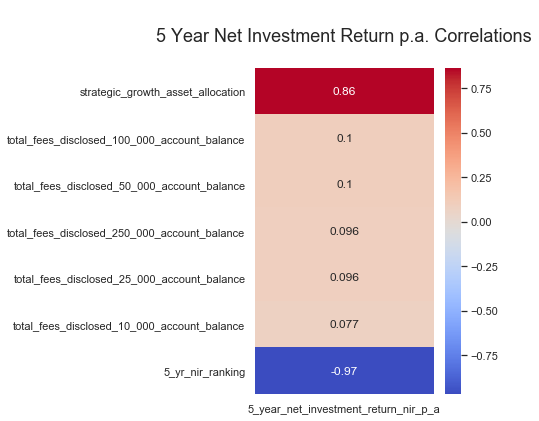

In [20]:
fn_corr_to_target(df, '5_year_net_investment_return_nir_p_a',
                 '5 Year Net Investment Return p.a. Correlations', 'img/apra_5yr_nir_corr.png')

## Rankings

In [21]:
cols = ['MySuper_Details', '5_yr_nir_ranking', '5_year_net_investment_return_nir_p_a', 'growth' ]
df[cols].sort_values('5_yr_nir_ranking')

,MySuper_Details,5_yr_nir_ranking,5_year_net_investment_return_nir_p_a,growth
126,AON Master Trust - Aon MySuper - H (NIR Rank 1),1,0.0983,H
125,AON Master Trust - Aon MySuper - H (NIR Rank 1),1,0.0983,H
127,AON Master Trust - Aon MySuper - H (NIR Rank 3),3,0.0982,H
128,AON Master Trust - Aon MySuper - H (NIR Rank 3),3,0.0982,H
129,AON Master Trust - Aon MySuper - H (NIR Rank 5),5,0.0981,H
...,...,...,...,...
161,AON Master Trust - Aon MySuper - L (NIR Rank 258),258,0.0378,L
162,AON Master Trust - Aon MySuper - L (NIR Rank 260),260,0.0377,L
163,AON Master Trust - Aon MySuper - L (NIR Rank 261),261,0.0376,L
165,AON Master Trust - Aon MySuper - L (NIR Rank 262),262,0.0375,L


In [22]:
# Select the top N funds you want to display
top_funds_to_show = 15

df[cols].nlargest(top_funds_to_show, '5_year_net_investment_return_nir_p_a')

,MySuper_Details,5_yr_nir_ranking,5_year_net_investment_return_nir_p_a,growth
125,AON Master Trust - Aon MySuper - H (NIR Rank 1),1,0.0983,H
126,AON Master Trust - Aon MySuper - H (NIR Rank 1),1,0.0983,H
127,AON Master Trust - Aon MySuper - H (NIR Rank 3),3,0.0982,H
128,AON Master Trust - Aon MySuper - H (NIR Rank 3),3,0.0982,H
129,AON Master Trust - Aon MySuper - H (NIR Rank 5),5,0.0981,H
130,AON Master Trust - Aon MySuper - H (NIR Rank 6),6,0.0980,H
131,AON Master Trust - Aon MySuper - H (NIR Rank 7),7,0.0979,H
132,AON Master Trust - Aon MySuper - H (NIR Rank 7),7,0.0979,H
316,QSuper - QSuper Lifetime - M (NIR Rank 9),9,0.0977,M
175,HOSTPLUS Superannuation Fund - Balanced option - H (NIR Rank 10),10,0.0965,H


In [23]:
# Assign some columns to display. Adjust to suit
cols = ['MySuper_Details', '5_yr_nir_ranking', '5_year_net_investment_return_nir_p_a', 'growth' ]

# Assign a dictionary to be passed into the pivot_table aggfunc. The keys are the columns to 
# aggregate and the values are the aggregate function or list of functions. 

                
aggfunc_dict = {'5_year_net_investment_return_nir_p_a': 'max',
                # get the max return of a fund grouping   
                
                '5_yr_nir_ranking': 'min', 
                # get the min ranking as lower the number the better
                
                'total_fees_disclosed_10_000_account_balance': 'max',
                'total_fees_disclosed_25_000_account_balance': 'max',
                'total_fees_disclosed_50_000_account_balance': 'max',
                'total_fees_disclosed_100_000_account_balance': 'max',
                'total_fees_disclosed_250_000_account_balance': 'max', 
                # get the max fees of a fund grouping
                
                'MySuper_Details': 'first'}
                # get the first name in the group.

# Assign some index columns to pivot on 
index=['rse_name', 'mysuper_product_name', 'growth']

# Assign the column name for which to get the top N funds
performance_column = '5_year_net_investment_return_nir_p_a'

# run a pivot on the dataframe with the top N funds
pd.pivot_table(df, values=aggfunc_dict.keys(), index=index, aggfunc=aggfunc_dict
              ).nlargest(top_funds_to_show, performance_column
                        ).reset_index()[cols]

,MySuper_Details,5_yr_nir_ranking,5_year_net_investment_return_nir_p_a,growth
0,AON Master Trust - Aon MySuper - H (NIR Rank 1),1,0.0983,H
1,QSuper - QSuper Lifetime - M (NIR Rank 10),9,0.0977,M
2,HOSTPLUS Superannuation Fund - Balanced option - H (NIR Rank 10),10,0.0965,H
3,Goldman Sachs & JBWere Superannuation Fund - MySuper Product - H (NIR Rank 12),12,0.0963,H
4,AustralianSuper - AustralianSuper MySuper - M (NIR Rank 14),14,0.0948,M
5,Local Government Super - MySuper Age Based Investment Strategy - H (NIR Rank 15),15,0.0941,H
6,Max Super Fund - Max Super Fund MySuper Plan - M (NIR Rank 16),16,0.0937,M
7,Unisuper - UniSuper Balanced - M (NIR Rank 17),17,0.0936,M
8,AON Master Trust - Aon MySuper - M (NIR Rank 18),18,0.0933,M
9,AMP Superannuation Savings Trust - CCA MySuper - H (NIR Rank 36),19,0.0932,H


In [24]:
# Re-run a pivot on the sorted dataframe of the top N funds.
pd.pivot_table(df.sort_values('5_year_net_investment_return_nir_p_a', ascending=False),
               values=aggfunc_dict.keys(), index=index, aggfunc=aggfunc_dict
               ).nlargest(top_funds_to_show, performance_column
               ).reset_index()[cols]

,MySuper_Details,5_yr_nir_ranking,5_year_net_investment_return_nir_p_a,growth
0,AON Master Trust - Aon MySuper - H (NIR Rank 1),1,0.0983,H
1,QSuper - QSuper Lifetime - M (NIR Rank 9),9,0.0977,M
2,HOSTPLUS Superannuation Fund - Balanced option - H (NIR Rank 10),10,0.0965,H
3,Goldman Sachs & JBWere Superannuation Fund - MySuper Product - H (NIR Rank 12),12,0.0963,H
4,AustralianSuper - AustralianSuper MySuper - M (NIR Rank 14),14,0.0948,M
5,Local Government Super - MySuper Age Based Investment Strategy - H (NIR Rank 15),15,0.0941,H
6,Max Super Fund - Max Super Fund MySuper Plan - M (NIR Rank 16),16,0.0937,M
7,Unisuper - UniSuper Balanced - M (NIR Rank 17),17,0.0936,M
8,AON Master Trust - Aon MySuper - M (NIR Rank 18),18,0.0933,M
9,AMP Superannuation Savings Trust - CCA MySuper - H (NIR Rank 19),19,0.0932,H


In [25]:
df_top_perform = fn_pivot_table(df, top_funds_to_show).reset_index()
df_top_perform[cols]

,MySuper_Details,5_yr_nir_ranking,5_year_net_investment_return_nir_p_a,growth
0,AON Master Trust - Aon MySuper - H (NIR Rank 1),1,0.0983,H
1,QSuper - QSuper Lifetime - M (NIR Rank 9),9,0.0977,M
2,HOSTPLUS Superannuation Fund - Balanced option - H (NIR Rank 10),10,0.0965,H
3,Goldman Sachs & JBWere Superannuation Fund - MySuper Product - H (NIR Rank 12),12,0.0963,H
4,AustralianSuper - AustralianSuper MySuper - M (NIR Rank 14),14,0.0948,M
5,Local Government Super - MySuper Age Based Investment Strategy - H (NIR Rank 15),15,0.0941,H
6,Max Super Fund - Max Super Fund MySuper Plan - M (NIR Rank 16),16,0.0937,M
7,Unisuper - UniSuper Balanced - M (NIR Rank 17),17,0.0936,M
8,AON Master Trust - Aon MySuper - M (NIR Rank 18),18,0.0933,M
9,AMP Superannuation Savings Trust - CCA MySuper - H (NIR Rank 19),19,0.0932,H


In [26]:
df.loc[df['5_year_net_investment_return_nir_p_a'].idxmax(),:]

rse_name                                                                       AON Master Trust
mysuper_product_name                                                                Aon MySuper
strategic_growth_asset_allocation                                                        0.8700
5_year_net_investment_return_nir_p_a                                                     0.0983
total_fees_disclosed_10_000_account_balance                                              0.0170
total_fees_disclosed_25_000_account_balance                                              0.0115
total_fees_disclosed_50_000_account_balance                                              0.0097
total_fees_disclosed_100_000_account_balance                                             0.0087
total_fees_disclosed_250_000_account_balance                                             0.0082
growth                                                                                        H
5_yr_nir_ranking                        

# Net Investment Return - Heatmap Top N Funds

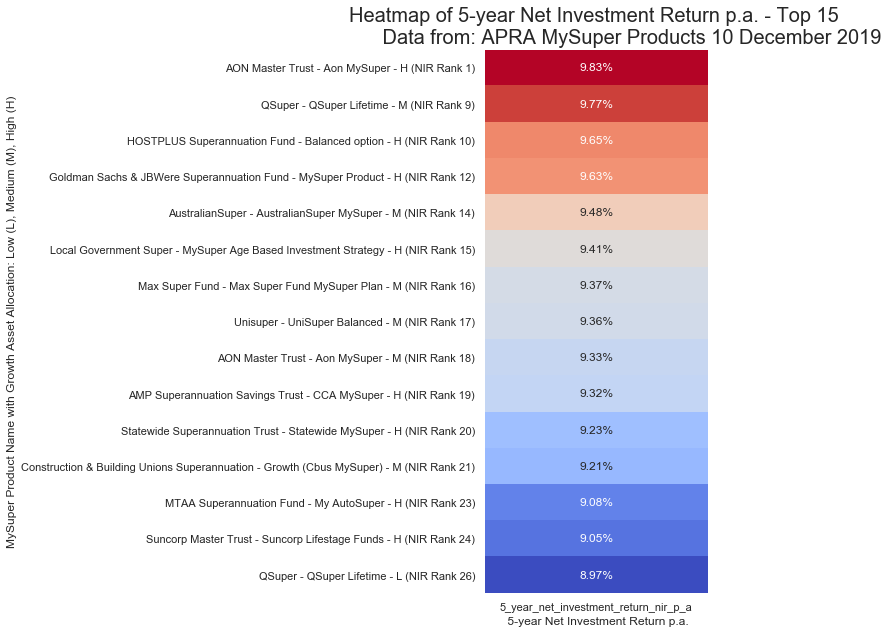

In [27]:
fn_pivot_table_for_heatmap(df, top_funds_to_show, 'img/apra_5_year_top_perform_heat.png')

# Total Fees - Heatmaps

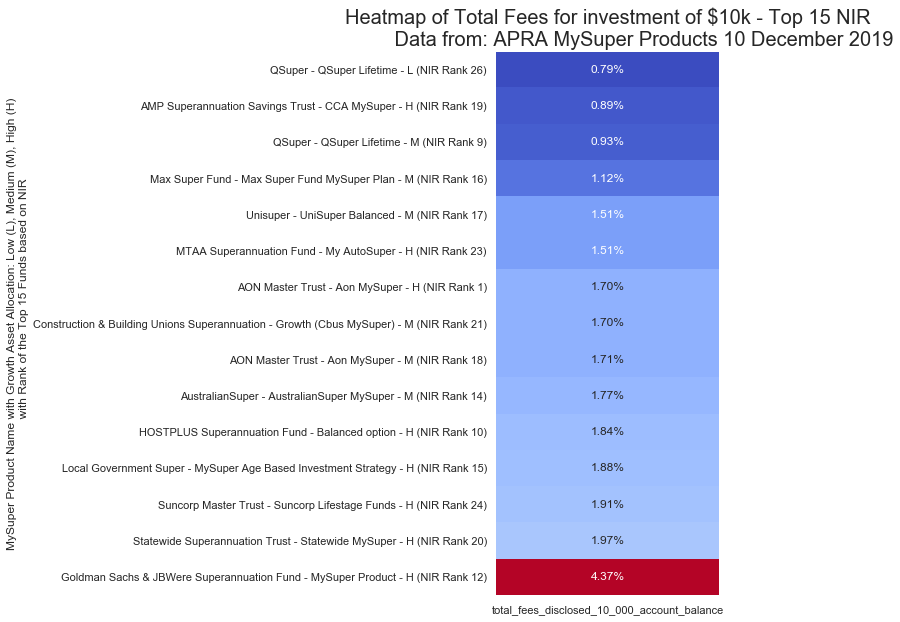

In [28]:
fn_pivot_table_for_heatmap_fees(df, 'total_fees_disclosed_10_000_account_balance', 10,
                                top_funds_to_show, 'img/apra_top_perform_fees_10k.png')

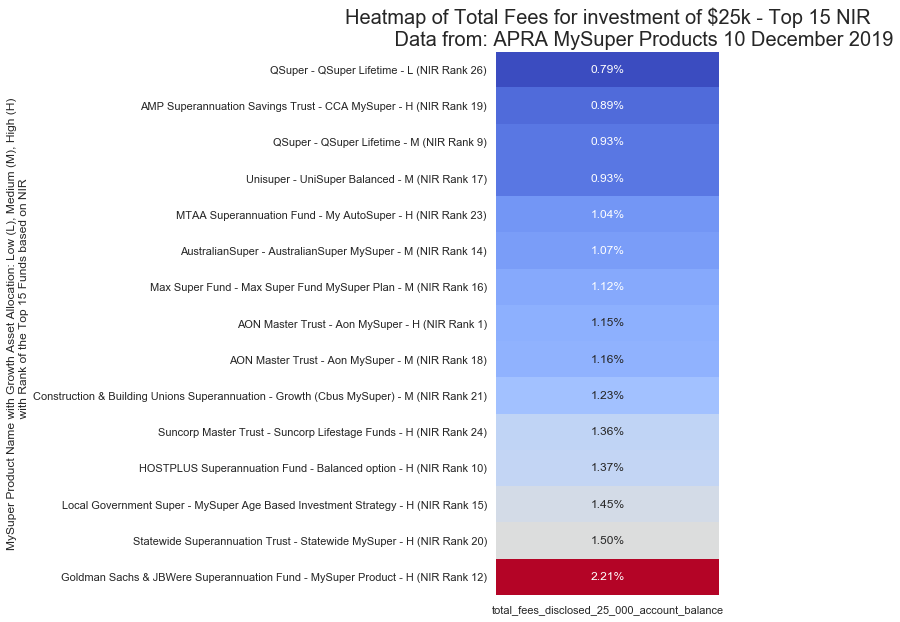

In [29]:
fn_pivot_table_for_heatmap_fees(df, 'total_fees_disclosed_25_000_account_balance', 25,
                               top_funds_to_show, 'img/apra_top_perform_fees_25k.png')

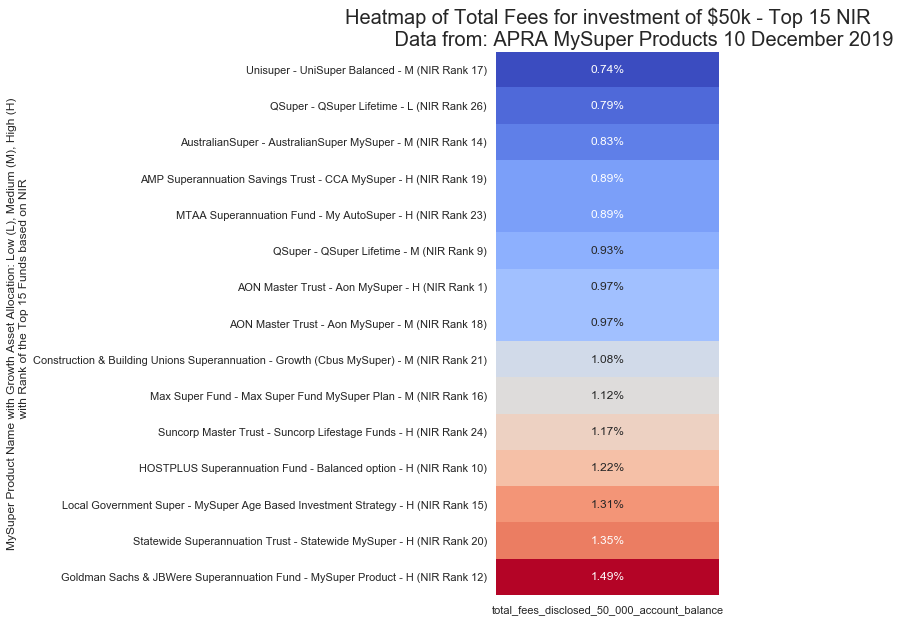

In [30]:
fn_pivot_table_for_heatmap_fees(df, 'total_fees_disclosed_50_000_account_balance', 50,
                               top_funds_to_show, 'img/apra_top_perform_fees_50k.png')

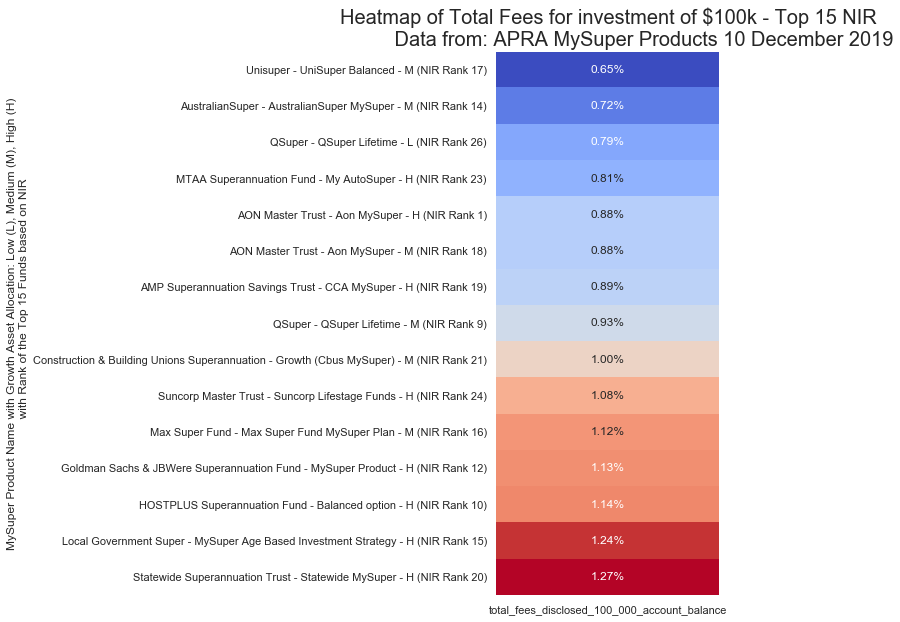

In [31]:
fn_pivot_table_for_heatmap_fees(df, 'total_fees_disclosed_100_000_account_balance', 100,
                               top_funds_to_show, 'img/apra_top_perform_fees_100k.png')

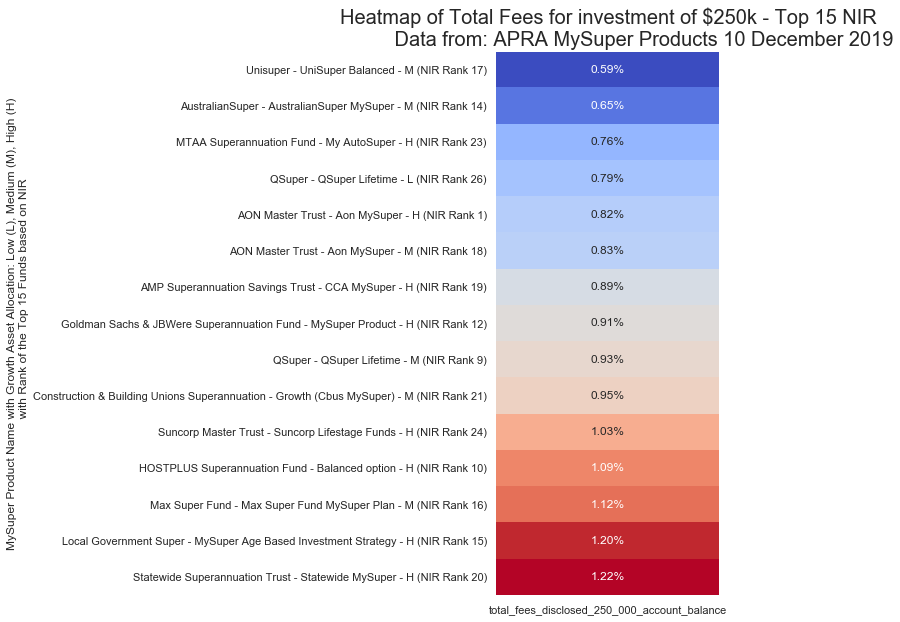

In [32]:
fn_pivot_table_for_heatmap_fees(df, 'total_fees_disclosed_250_000_account_balance', 250,
                               top_funds_to_show, 'img/apra_top_perform_fees_250k.png')

# SANDBOX

In [33]:
def fn_fee_checks(invest_amt, invest_fees, admin_fee,  indirect_fee):
    """Calculate super fees. """
    invest_cost = invest_amt * invest_fees
    indirect_cost = invest_amt * indirect_fee
    total_cost = invest_cost + admin_fee + indirect_cost
    total_fee = total_cost / invest_amt
    
    print(f'For every ${invest_amt} you have in the superannuation product '\
    f'you will be charged ${invest_cost:.0f} each year')
    print(f'And, you will be charged $78 in administration fees regardless of your balance')
    print(f'And, indirect investment costs of ${indirect_cost:.0f} each year'\
          f'will be deducted from your investment')
    print(f'If your balance was ${invest_amt}, then for that year you will be charged fees '\
          f'of ${total_cost:.0f} for the superannuation product.')
    print(f'FINAL TOTAL COST FEE: {total_fee:.2%}')

In [34]:
# Estimated Hostplus Superannuation Fund - 30 June 2019 Fees and costs
# Investment option: Balanced
# https://pds.hostplus.com.au/6-fees-and-costs

invest_amt = 50000
invest_fees = 0.58/100 # %
admin_fee = 78 # p.a.
indirect_fee = 0.33/100 # %



fn_fee_checks(invest_amt, invest_fees, admin_fee,  indirect_fee)

For every $50000 you have in the superannuation product you will be charged $290 each year
And, you will be charged $78 in administration fees regardless of your balance
And, indirect investment costs of $165 each yearwill be deducted from your investment
If your balance was $50000, then for that year you will be charged fees of $533 for the superannuation product.
FINAL TOTAL COST FEE: 1.07%


In [35]:
# Estimated Hostplus Superannuation Fund - 30 June 2019 Fees and costs
# Investment option: Indexed Balanced
# https://pds.hostplus.com.au/6-fees-and-costs

invest_amt = 50000
invest_fees = 0.02/100 # %
admin_fee = 78 # p.a.
indirect_fee = 0.03/100 # %

fn_fee_checks(invest_amt, invest_fees, admin_fee,  indirect_fee)

For every $50000 you have in the superannuation product you will be charged $10 each year
And, you will be charged $78 in administration fees regardless of your balance
And, indirect investment costs of $15 each yearwill be deducted from your investment
If your balance was $50000, then for that year you will be charged fees of $103 for the superannuation product.
FINAL TOTAL COST FEE: 0.21%


In [36]:
# feature_cols = [col for col in df.columns if col != '5_year_net_investment_return_nir_p_a']
# fn_gen_scatterplots(df, '5_year_net_investment_return_nir_p_a', feature_cols, 3)

In [37]:
# fn_gen_histograms(df,3)

In [38]:
#  fn_gen_boxplots(df, 3) GET aN ERROR on this dataset